# Shopping Mall Customer Segmentation
Unsupervised Machine Learning Project<br>
[<font color='lightgreen'>Ted Dickey</font>](https://teddickey.com)

- Problem Statement: Understand the Target Customers for team to plan a marketing strategy accordingly.
- Criteria: You want to identify the most important shopping groups based on income, age, and shopping score.
  
- Objective: Market Segmentation  -- Divide mall target market into appropriate groups based on demographic  and behavioral factors to better understand the target for marketing activities.

- **The Approach**
    - Perform some quick EDA
    - Use KMEANS Clustering Algorithm to create segments
    - Use Summary Statistics on the clusters
    - Visualize

Advantages of Customer Segmentation:
- Price Optimization
- Enhanced Competitiveness
- Brand Awareness
- Acquisition & Reputation
- Increased Revenue and ROI

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing


In [13]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.rename(columns={'Genre':'Gender','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [16]:
df.shape

(200, 5)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual Income (k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [12]:
df.dtypes

Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Gender                    object
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
dtype: int64

## Descriptive Statistics


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.drop(['CustomerID'], axis=1, inplace=True)


KeyError: "['CustomerID'] not found in axis"

In [92]:
df.head()

,Gender,Age,Annual Income (k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## EDA

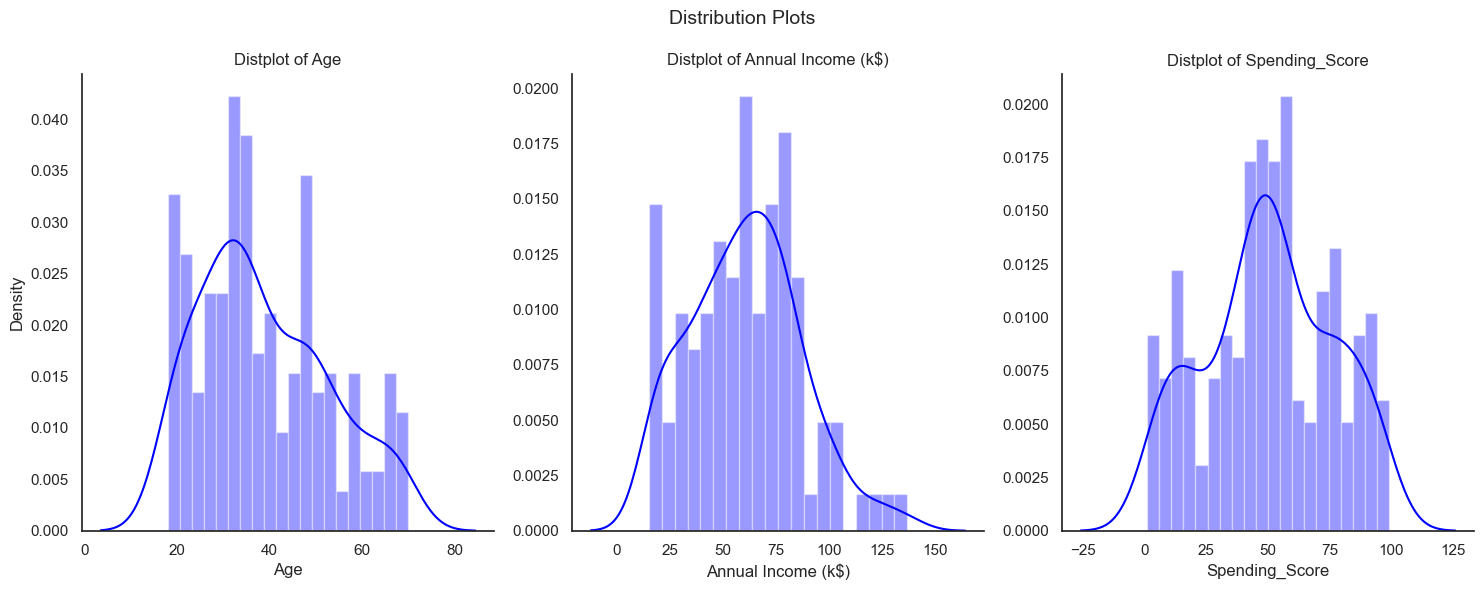

In [73]:
columns = ['Age', 'Annual Income (k$)', 'Spending_Score']
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for n, column in enumerate(columns):
    sns.distplot(df[column], bins = 20, ax=axes[n], kde=True, color='blue')
    sns.despine()
    #sns.set_style('white')
    axes[n].set_title('Distplot of {}'.format(column))

    # Remove y-axis labels for all subplots except the first one
    if n != 0:
        axes[n].set_ylabel('')

# Set y-axis label for the first subplot
axes[0].set_ylabel("Density")

plt.suptitle("Distribution Plots", fontsize=14)
plt.tight_layout()
plt.show()

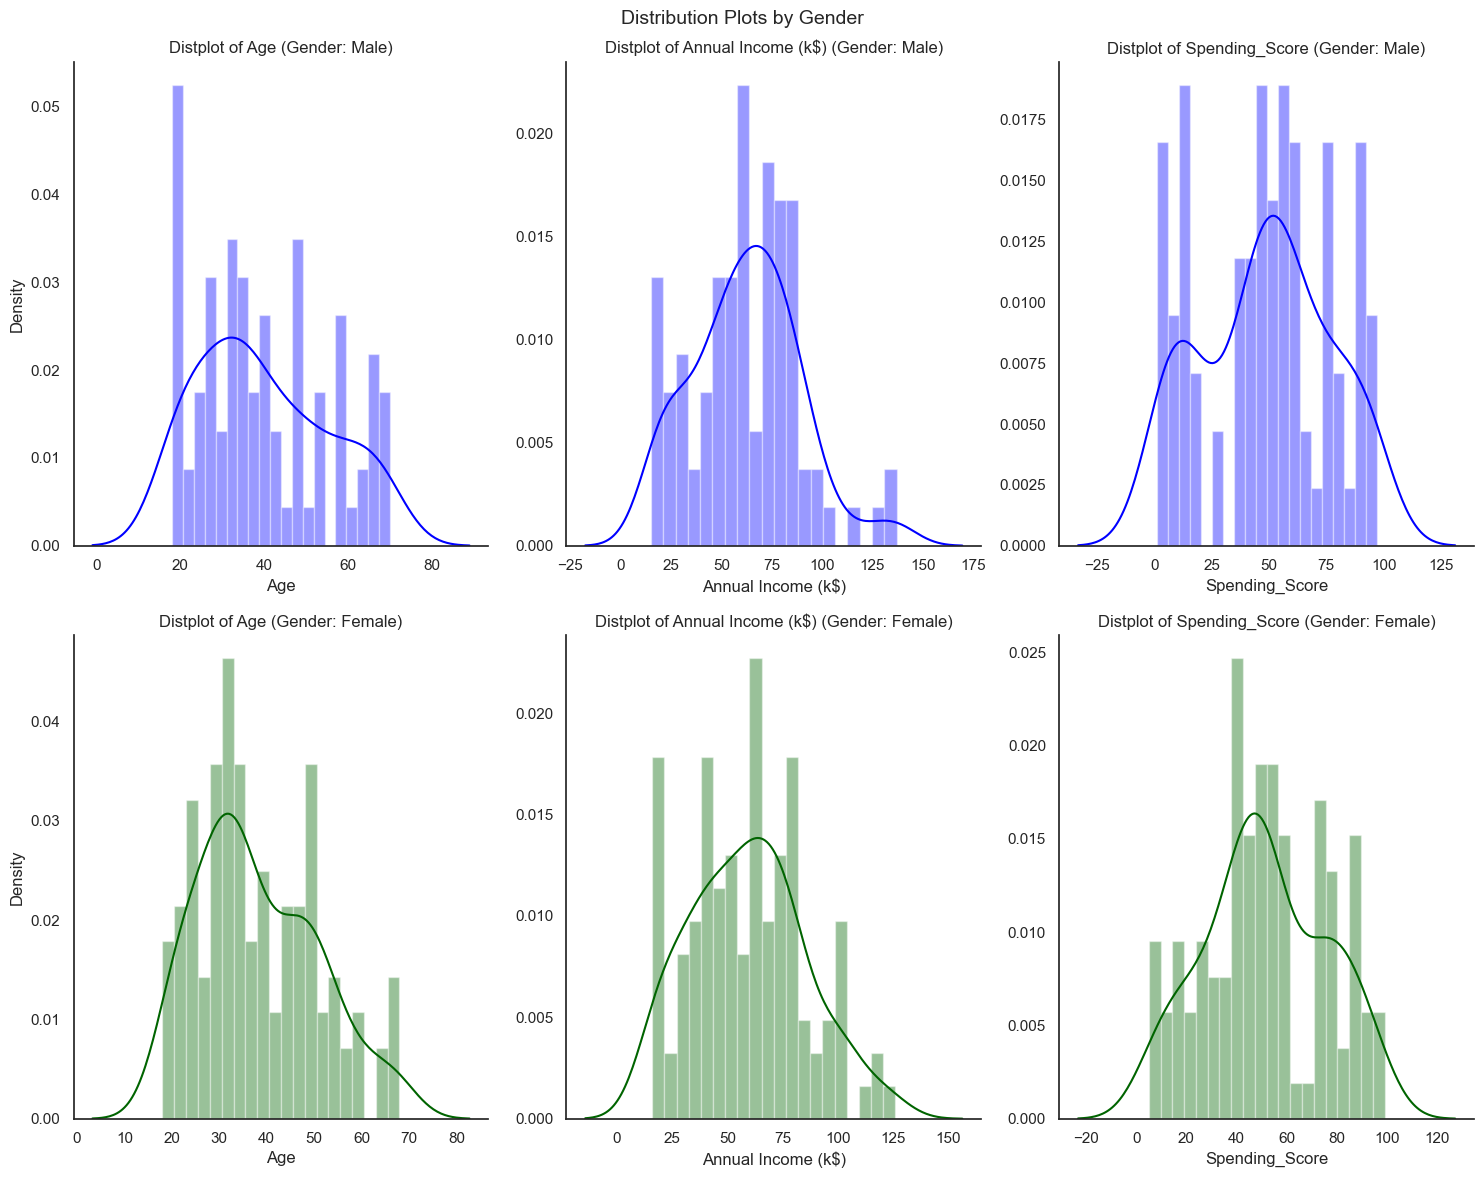

In [78]:
columns = ['Age', 'Annual Income (k$)', 'Spending_Score']
genders = df['Gender'].unique()
colors = ['blue', 'darkgreen']

# Create subplots for each gender
fig, axes = plt.subplots(len(genders), len(columns), figsize=(15, 6 * len(genders)))

for i, gender in enumerate(genders):
    for j, column in enumerate(columns):
        ax = axes[i, j]
        data = df[df['Gender'] == gender]
        sns.distplot(data[column], bins=20, ax=ax, kde=True, color=colors[i])
        sns.despine()
        ax.set_title('Distplot of {} (Gender: {})'.format(column, gender))

        # Remove y-axis labels for all subplots except the first one
        if j != 0:
            ax.set_ylabel('')

# Set y-axis label for the first subplot of each gender
for ax in axes[:, 0]:
    ax.set_ylabel("Density")

plt.suptitle("Distribution Plots by Gender", fontsize=14)
plt.tight_layout()
plt.show()


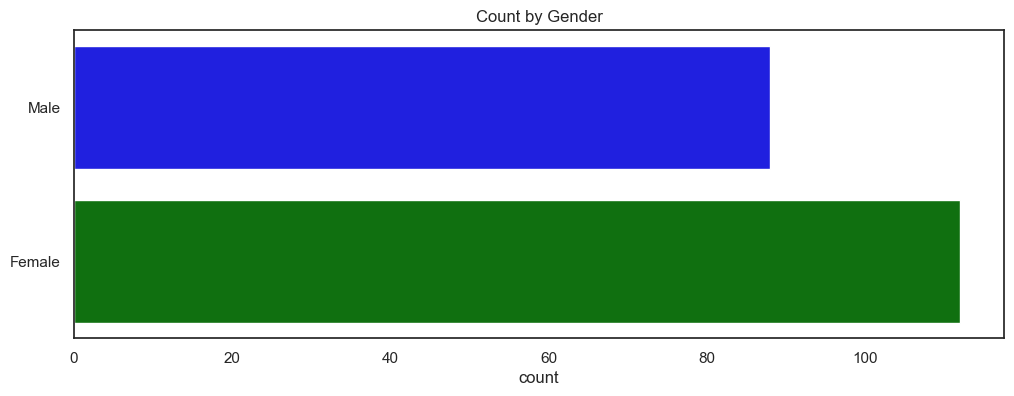

In [83]:
plt.figure(figsize=(12, 4))
sns.countplot(df, y='Gender',  palette={'Male': 'blue', 'Female': 'green'})
plt.ylabel('')
plt.title('Count by Gender')
plt.show()

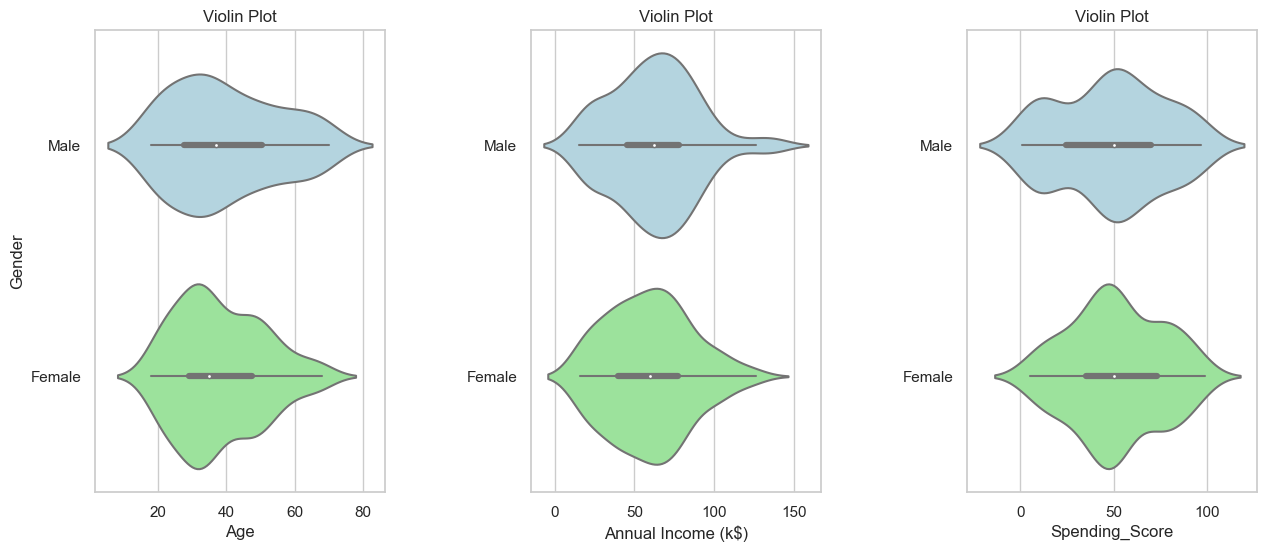

In [99]:
plt.figure(figsize=(15, 6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending_Score']:
    n+=1
    plt.subplot(1, 3, n)    
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df, palette={'Male': 'lightblue', 'Female': 'lightgreen'})
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')

plt.show()






We can see that there is a high density around age 30ish for females as compared to males. Annual income is similar for both males and females around 65kish. Density of Spending score is similar for both genders, as well.

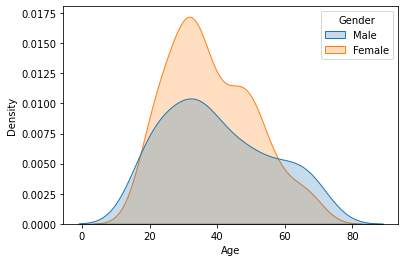

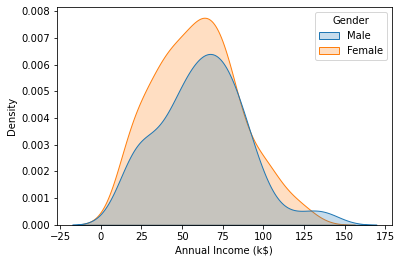

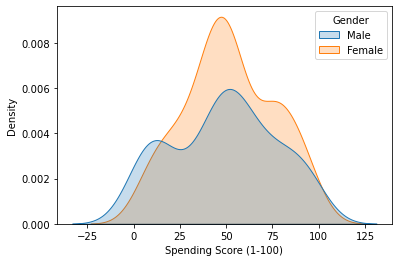

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df['Gender'])

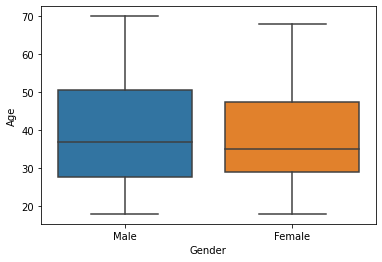

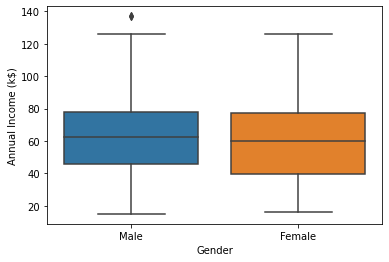

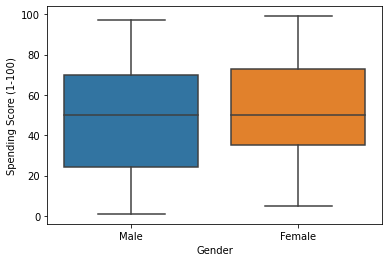

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x= 'Gender', y=df[i])

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

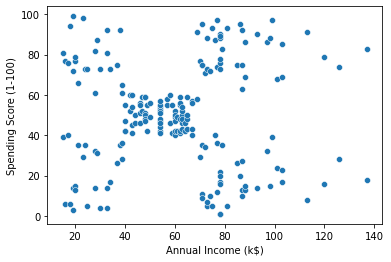

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)' )

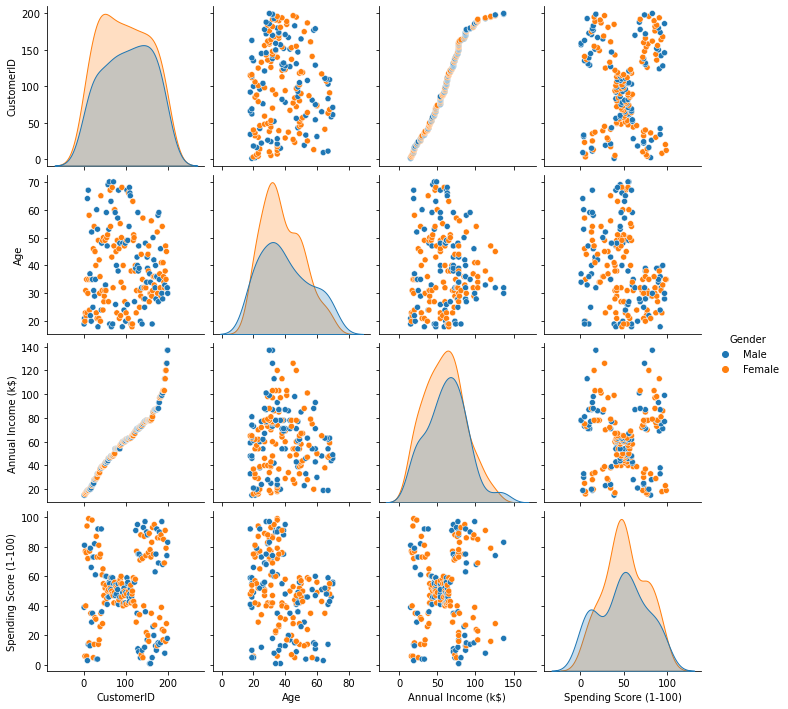

In [14]:
#df=df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue='Gender')

In [15]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
                       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

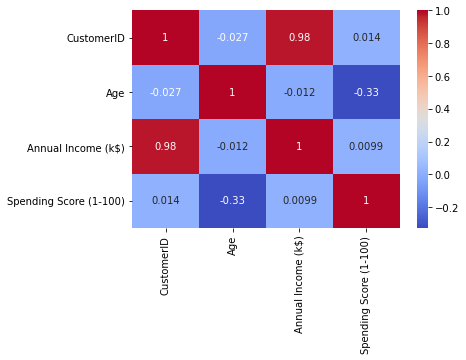

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [18]:
clustering1 = KMeans(n_clusters=3)

In [19]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [22]:
df['Income Cluster'].value_counts()

0    90
2    74
1    36
Name: Income Cluster, dtype: int64

In [23]:
clustering1.inertia_

23517.33093093092

# Elbow Method

In [24]:
intertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    

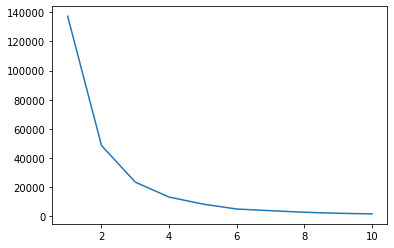

In [25]:
plt.plot(range(1,11), intertia_scores)

# Analysis

In [26]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
    'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,37.833333,99.888889,50.638889
2,39.500000,33.486486,50.229730


# Bivariate Clustering

In [29]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,4


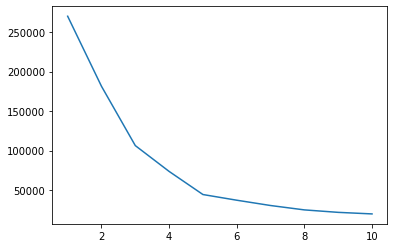

In [30]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), intertia_scores2)
    

In [38]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

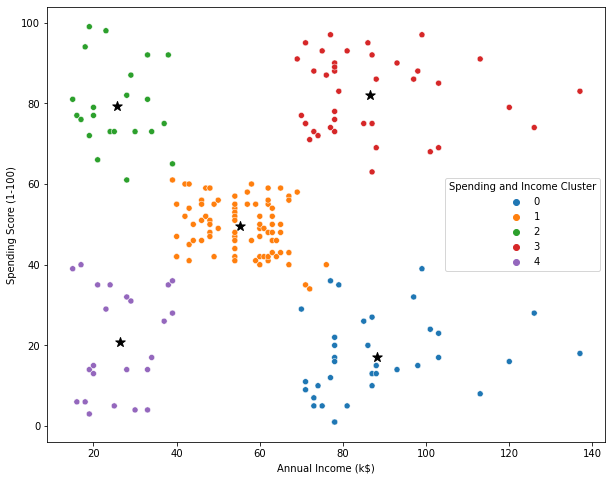

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(x= centers['x'], y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariage.png')

In [41]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


In [42]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
    'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [43]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [44]:
scale = StandardScaler()

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,4


In [47]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,4,1
1,2,21,15,81,2,2,1
2,3,20,16,6,2,4,0
3,4,23,16,77,2,2,0
4,5,31,17,40,2,4,0


In [49]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [50]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [52]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [54]:
dff = scale.fit_transform(dff)

In [55]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [57]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


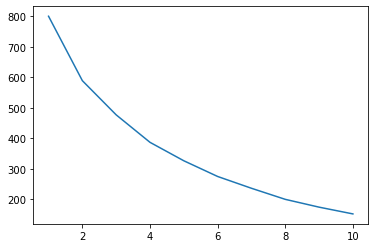

In [59]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3)
    

In [60]:
df.to_csv('Clustering.csv')